# PCA Churn Prediction - Bank Data

***
_**Importing the required libraries & packages**_

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

_**Changing The Default Working Directory Path & Reading the Dataset using Pandas Command**_

In [2]:
os.chdir('C:\\Users\\Shridhar\\OneDrive\\Desktop\\Top Mentor\\Batch 74 Day 19')
df=pd.read_csv('Bank Data Dimension Reduction.csv')

## Data Cleaning
_**Checking for the null values in all the columns of the dataset**_

In [3]:
df.isna().sum()

Index        0
Interest    68
Credit       0
Gender      21
Previous     7
Duration    70
Churn        0
dtype: int64

_**Dropping the column which is not needed for model fitting**_

In [4]:
df.drop(['Index'],axis=1,inplace=True)

_**Grouping by the <span style= "color:red">Gender</span> column to find out the maximum repeated values**_

In [5]:
df.groupby('Gender').size()

Gender
0.0    290
1.0    289
dtype: int64

_**Filling the null values of the <span style= "color:red">Gender</span> column with most frequent values**_

In [6]:
df['Gender']=df['Gender'].fillna(0)

_**Grouping by the <span style= "color:red">Gender</span> column to find out the maximum repeated values after updating**_

In [7]:
df.groupby('Gender').size()

Gender
0.0    311
1.0    289
dtype: int64

_**Finding out the value counts of the <span style= "color:red">Previous</span> column to find out the maximum repeated values**_

In [8]:
df['Previous'].value_counts()

0.0    302
1.0    291
Name: Previous, dtype: int64

_**Filling the null values of the <span style= "color:red">Previous</span> column with most frequent values and Finding out the value counts of the <span style= "color:red">Previous</span> column to find out the maximum repeated values after updating**_

In [9]:
df['Previous']=df['Previous'].fillna(0)
df['Previous'].value_counts()

0.0    309
1.0    291
Name: Previous, dtype: int64

_**Filling the null values of the <span style= "color:red">Interest</span> column with mean value of the same column**_

In [10]:
df['Interest'].fillna(df['Interest'].mean(),inplace=True)

_**Filling the null values of the <span style= "color:red">Duration</span> column with median values of the same column**_

In [11]:
df['Duration'].fillna(df['Duration'].median(),inplace=True)

_**Checking out the null values of the all columns after filling it out (Cross Reference)**_

In [12]:
df.isna().sum()

Interest    0
Credit      0
Gender      0
Previous    0
Duration    0
Churn       0
dtype: int64

_**Checking out the data types of all the columns in the dataset so that it can be converted to appropriate data types for model fitting**_

In [13]:
df.dtypes

Interest    float64
Credit        int64
Gender      float64
Previous    float64
Duration    float64
Churn        object
dtype: object

_**Changing the data types of <span style= "color:red">Gender</span>, <span style= "color:red">Previous</span> column from "float" to "category"**_

In [14]:
df['Gender']=df['Gender'].astype('category')
df['Previous']=df['Previous'].astype('category')

_**Label Encoding the <span style= "color:red">Churn</span> column**_

In [15]:
df['Churn']=df['Churn'].astype('category')
df['Churn']=df['Churn'].cat.codes

_**Assigning the dependent and independent variable**_

In [16]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Data Preprocessing
_**Standardizing the independent variable of the dataset**_

In [17]:
sc=StandardScaler()
x=sc.fit_transform(x)

_**Processing independent variable with Principal Component Analysis to get the importance of all the columns in the independent variable**_

In [18]:
pca=PCA()
pca_x=pca.fit_transform(x)

_**Getting the numeric value for the importances of columns of the independent variable**_

In [19]:
pca.explained_variance_ratio_

array([0.33943997, 0.20168854, 0.20083191, 0.18998087, 0.06805872])

## Model Fitting
_**Splitting the dependent variable & independent variable into training and test dataset using train test split**_

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

_**Fitting the Logistic Regression model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [21]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,LR_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,LR_pred),'\n')
print('Classification Report:\n',classification_report(y_test,LR_pred))

Accuracy Score: 0.7666666666666667 

Confusion Matrix:
 [[ 0 28]
 [ 0 92]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



_**Fitting the Decision Tree Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [22]:
DT=DecisionTreeClassifier(random_state=99)
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,DT_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,DT_pred),'\n')
print('Classification Report:\n',classification_report(y_test,DT_pred))

Accuracy Score: 0.675 

Confusion Matrix:
 [[ 8 20]
 [19 73]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.29      0.29        28
           1       0.78      0.79      0.79        92

    accuracy                           0.68       120
   macro avg       0.54      0.54      0.54       120
weighted avg       0.67      0.68      0.67       120



_**_**Fitting the Random Forest Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [23]:
RF=RandomForestClassifier(random_state=99)
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,RF_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,RF_pred),'\n')
print('Classification Report:\n',classification_report(y_test,RF_pred))

Accuracy Score: 0.6666666666666666 

Confusion Matrix:
 [[ 1 27]
 [13 79]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.04      0.05        28
           1       0.75      0.86      0.80        92

    accuracy                           0.67       120
   macro avg       0.41      0.45      0.42       120
weighted avg       0.59      0.67      0.62       120



## Dimensional Reduction
_**Processing independent variable with Principal Component Analysis of 2 components to get the importance of all the columns in the independent variable**_

In [24]:
pca1=PCA(n_components=2)
pca_x1=pca1.fit_transform(x)

_**Getting the numeric value for the importances of columns of the independent variable after reducing its dimensions**_

In [25]:
pca1.explained_variance_ratio_

array([0.33943997, 0.20168854])

_**Splitting the dependent variable & independent variable into training and test dataset using train test split after reducing the dimensions of the independent variable**_

In [26]:
pca_x_train,pca_x_test,y_train,y_test=train_test_split(pca_x1,y,test_size=0.2,random_state=33)

_**Fitting the Logistic Regression model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [27]:
LR1=LogisticRegression()
LR1.fit(pca_x_train,y_train)
LR1_pred=LR1.predict(pca_x_test)
print('Accuracy Score:',accuracy_score(y_test,LR1_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,LR1_pred),'\n')
print('Classification Report:\n',classification_report(y_test,LR1_pred))

Accuracy Score: 0.7666666666666667 

Confusion Matrix:
 [[ 0 28]
 [ 0 92]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



_**Fitting the Decision Tree Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [28]:
DT1=DecisionTreeClassifier(random_state=99)
DT1.fit(pca_x_train,y_train)
DT1_pred=DT1.predict(pca_x_test)
print('Accuracy Score:',accuracy_score(y_test,DT1_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,DT1_pred),'\n')
print('Classification Report:\n',classification_report(y_test,DT1_pred))

Accuracy Score: 0.625 

Confusion Matrix:
 [[ 9 19]
 [26 66]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.32      0.29        28
           1       0.78      0.72      0.75        92

    accuracy                           0.62       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.66      0.62      0.64       120



_**Fitting the Random Forest Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [29]:
RF1=RandomForestClassifier(random_state=99)
RF1.fit(pca_x_train,y_train)
RF1_pred=RF1.predict(pca_x_test)
print('Accuracy Score:',accuracy_score(y_test,RF1_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,RF1_pred),'\n')
print('Classification Report:\n',classification_report(y_test,RF1_pred))

Accuracy Score: 0.6833333333333333 

Confusion Matrix:
 [[ 6 22]
 [16 76]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.21      0.24        28
           1       0.78      0.83      0.80        92

    accuracy                           0.68       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.66      0.68      0.67       120



_**Processing independent variable with Principal Component Analysis of 4 components to get the importance of all the columns in the independent variable**_

In [30]:
pca2=PCA(n_components=4)
pca_x2=pca2.fit_transform(x)

_**Getting the numeric value for the importances of columns of the independent variable after reducing its dimensions**_

In [31]:
pca2.explained_variance_ratio_

array([0.33943997, 0.20168854, 0.20083191, 0.18998087])

_**Splitting the dependent variable & independent variable into training and test dataset using train test split after reducing the dimensions of the independent variable**_

In [32]:
pca_x_train1,pca_x_test1,y_train,y_test=train_test_split(pca_x2,y,test_size=0.2,random_state=33)

_**Fitting the Logistic Regression model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [33]:
LR2=LogisticRegression()
LR2.fit(pca_x_train1,y_train)
LR2_pred=LR2.predict(pca_x_test1)
print('Accuracy Score:',accuracy_score(y_test,LR2_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,LR2_pred),'\n')
print('Classification Report:\n',classification_report(y_test,LR2_pred))

Accuracy Score: 0.7666666666666667 

Confusion Matrix:
 [[ 0 28]
 [ 0 92]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



_**Fitting the Decision Tree Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [34]:
DT2=DecisionTreeClassifier(random_state=99)
DT2.fit(pca_x_train1,y_train)
DT2_pred=DT2.predict(pca_x_test1)
print('Accuracy Score:',accuracy_score(y_test,DT2_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,DT2_pred),'\n')
print('Classification Report:\n',classification_report(y_test,DT2_pred))

Accuracy Score: 0.5666666666666667 

Confusion Matrix:
 [[ 2 26]
 [26 66]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.07      0.07        28
           1       0.72      0.72      0.72        92

    accuracy                           0.57       120
   macro avg       0.39      0.39      0.39       120
weighted avg       0.57      0.57      0.57       120



_**Fitting the Random Forest Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [35]:
RF2=RandomForestClassifier(random_state=99)
RF2.fit(pca_x_train1,y_train)
RF2_pred=RF2.predict(pca_x_test1)
print('Accuracy Score:',accuracy_score(y_test,RF2_pred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,RF2_pred),'\n')
print('Classification Report:\n',classification_report(y_test,RF2_pred))

Accuracy Score: 0.6583333333333333 

Confusion Matrix:
 [[ 3 25]
 [16 76]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.11      0.13        28
           1       0.75      0.83      0.79        92

    accuracy                           0.66       120
   macro avg       0.46      0.47      0.46       120
weighted avg       0.61      0.66      0.63       120



_**Create the pickle file of the model with the highest accuracy score with the model name**_

In [36]:
pickle.dump(LR,open('PCA pickle.pkl','wb'))

## Model Testing
_**Loading the pickle file**_

In [37]:
model=pickle.load(open('PCA pickle.pkl','rb'))

_**Predicting the independent variable using the loaded pickle file and getting the accuracy score, Confusion Matrix and Classification Report of the complete data**_

In [38]:
y_fpred=model.predict(x)
print('Accuracy Score:',accuracy_score(y,y_fpred),'\n')
print('Confusion Matrix:\n',confusion_matrix(y,y_fpred),'\n')
print('Classification Report:\n',classification_report(y,y_fpred))

Accuracy Score: 0.7583333333333333 

Confusion Matrix:
 [[  0 145]
 [  0 455]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.76      1.00      0.86       455

    accuracy                           0.76       600
   macro avg       0.38      0.50      0.43       600
weighted avg       0.58      0.76      0.65       600



_**Plotting the line graph to represent the Accuracy between Predicted value and Actual Value and saving the PNG file**_

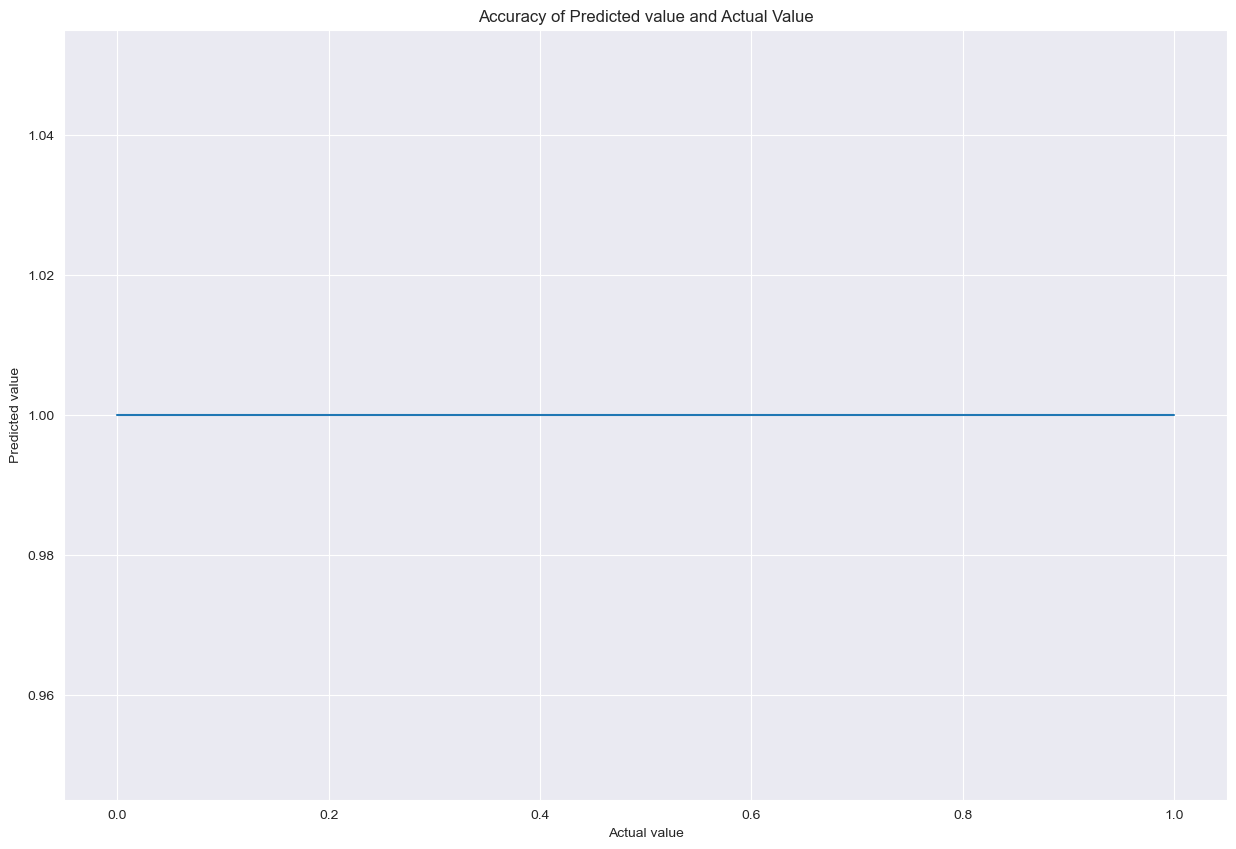

In [39]:
sns.set_style('darkgrid')
plt.plot(y,y_fpred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Accuracy of Predicted value and Actual Value')
plt.savefig('Accuracy of Predicted value and Actual Value.png')
plt.show()